In [1]:
%matplotlib inline

import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

4.1.1


In [2]:
blue=(100, 43, 46, 124, 255, 255) #HSV

In [3]:
vc = cv2.VideoCapture(0)
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

True

ValueError: max() arg is an empty sequence

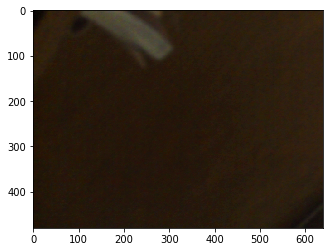

In [5]:
if vc.isOpened():
    is_capturing, frame = vc.read()
    plt.imshow(frame)
    frame = cv2.cvtColor(frame, cv2.cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

while is_capturing:
    try:   # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        HSVframe =cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        colorLow = np.array([100,43,46])
        colorHigh = np.array([124,255,255])
        mask = cv2.inRange(HSVframe, colorLow, colorHigh)
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),20)
        
        print("111111")
        webcam_preview.set_data(frame)
        plt.draw()        
        display.clear_output(wait=True)
        display.display(plt.gcf())
    except KeyboardInterrupt:
        vc.release()